In [0]:
# Importing required Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix


In [0]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickess','uniform_cell_size', 'uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin',
         'normal_nucleoli','mitoses','class']
df= pd.read_csv(url,names=names)

In [13]:
# Preprocessing the data

df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#Print shape of the dataset

print(df.shape)


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickess', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [17]:
print(df.loc[698])
print(df.describe())

clump_thickess             4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickess  uniform_cell_size  ...     mitoses       class
count      699.000000         699.000000  ...  699.000000  699.000000
mean         4.417740           3.134478  ...    1.589413    2.689557
std          2.815741           3.051459  ...    1.715078    0.951273
min          1.000000           1.000000  ...    1.000000    2.000000
25%          2.000000           1.000000  ...    1.000000    2.000000
50%          4.000000           1.000000  ...    1.000000    2.000000
75%          6.000000           5.000000  ...    1.000000    4.000000
max         10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


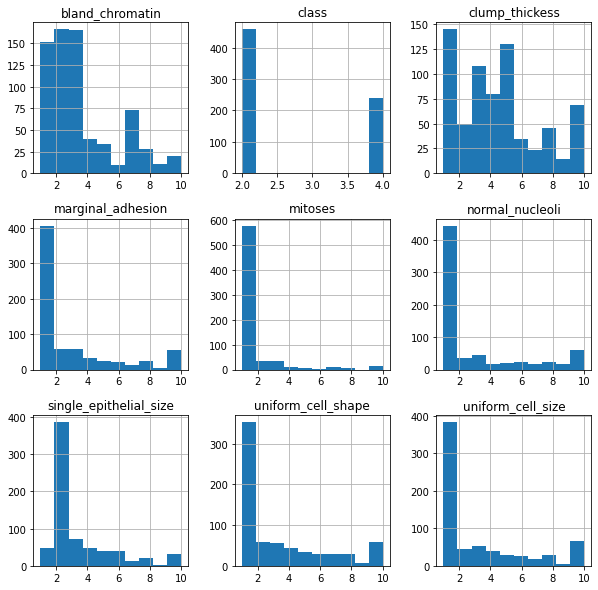

In [20]:
# Visualizing the dataset

df.hist(figsize=(10,10))
plt.show()


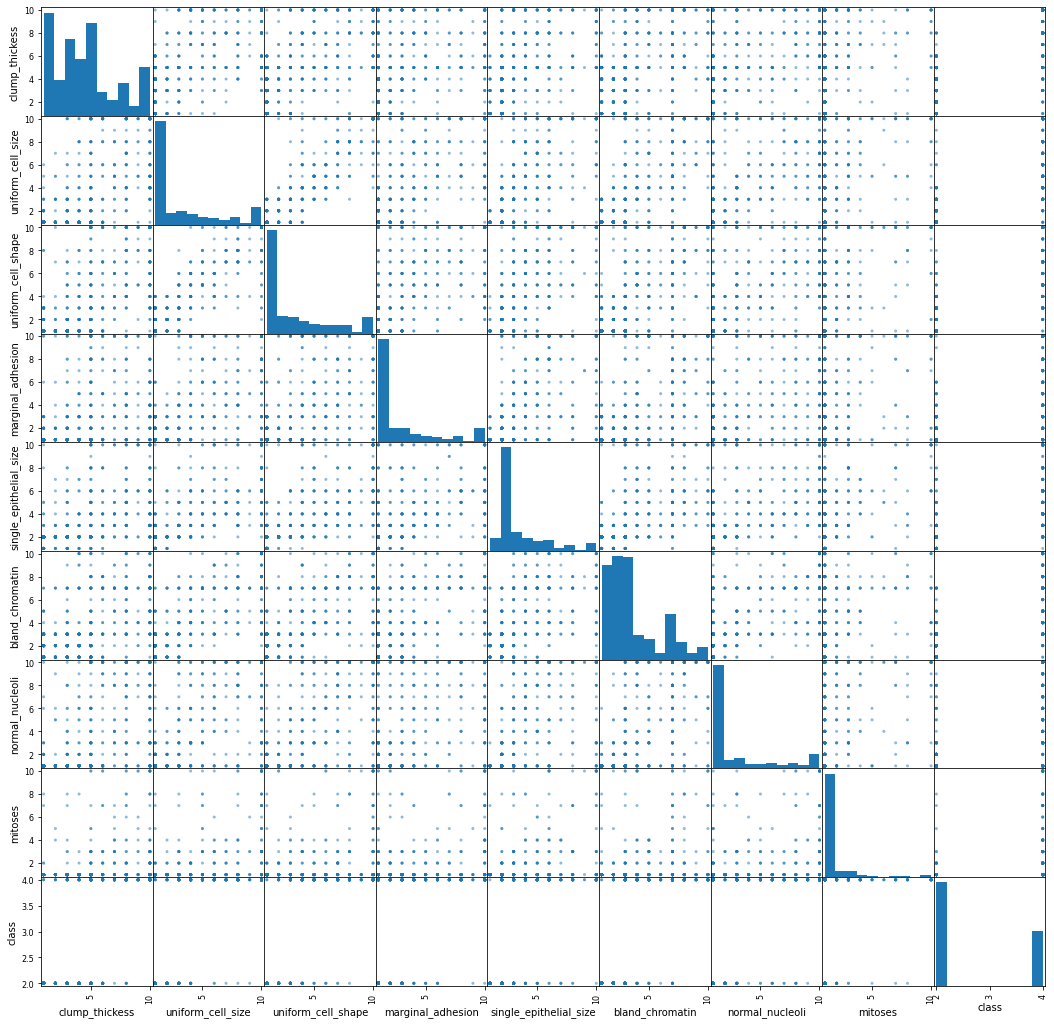

In [23]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [0]:
# Create X and Y datasets

X = np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [0]:
# Specify testing options
seed=8
scoring='accuracy'

In [48]:
# Define the models to train

models=[]

models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

# Evaluate each model in turn
results=[]
names=[]

for name,model in models:
  kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f) "% (name,cv_results.mean(),cv_results.std())
  print(msg)



KNN: 0.974935 (0.019921) 
SVM: 0.649253 (0.062729) 


In [49]:
# Make Predictions on validation Data
for name,model in models:
  model.fit(X_train,y_train)
  predictions=model.predict(X_test)
  print (name)
  print (accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))



KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        95
           4       0.93      0.93      0.93        45

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.6785714285714286
              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
